## Welcome to the Exploratory Data Analysis!

Here we import the necessary libraries for data manipulation and visualization.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load the Dataset

In [5]:
# We specify the file path and use 'openpyxl' as the engine for reading the Excel file
file_path = "../data/dataset//OR_AE2_Project_Adjusted.xlsx"  # This operation may take around 100 seconds
df = pd.read_excel(file_path, engine='openpyxl')
df.head()

,Site_Code,Site_Type,Site_X,Site_Y,Site_Loc_GPs,Site_Loc_GP_List,Site_Pop_20miles,Pat_X,Pat_Y,Pat_Loc_GPs,Pat_Loc_GP_List,Drive_Distance_Miles,Driving_Time_mins,Attendance_Type,Age_Group,Wait_Time,Year,Month,Number_Of_Attendances
0,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,00 to 05,New - unplanned,20-39,00-29,1,2,1
1,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,00 to 05,New - unplanned,20-39,00-29,1,3,2
2,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,00 to 05,New - unplanned,20-39,00-29,1,4,3
3,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,00 to 05,New - unplanned,20-39,00-29,1,5,3
4,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,00 to 05,New - unplanned,20-39,00-29,1,6,2


### Visualization of some variables

Visualizing the distribution of the number of attendances

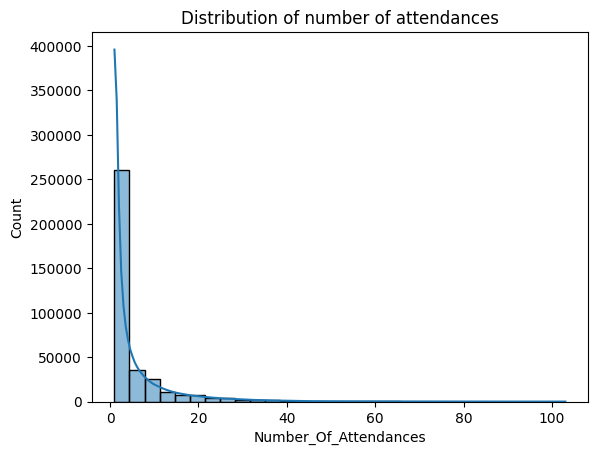

In [6]:
# We create a histogram with a kernel density estimate (KDE) for 'Number_Of_Attendances'
sns.histplot(df['Number_Of_Attendances'], kde=True, bins=30)
plt.title('Distribution of number of attendances')
plt.show()

Visualizing the distribution of driving distances

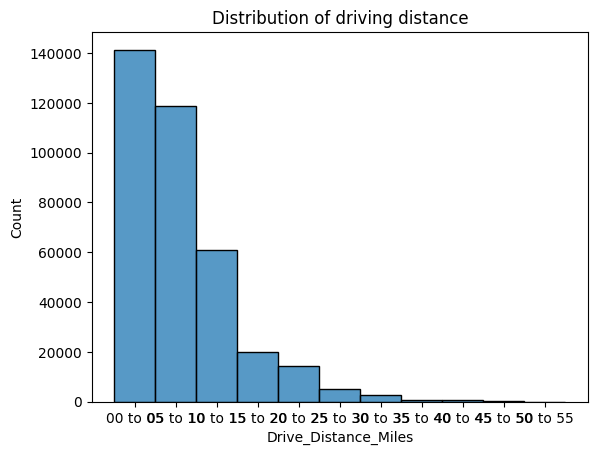

In [8]:
# We create a histogram for 'Drive_Distance_Miles' without KDE
sns.histplot(df['Drive_Distance_Miles'], kde=False, bins=30)
plt.title('Distribution of driving distance')
plt.show()

Visualizing the distribution of wait times

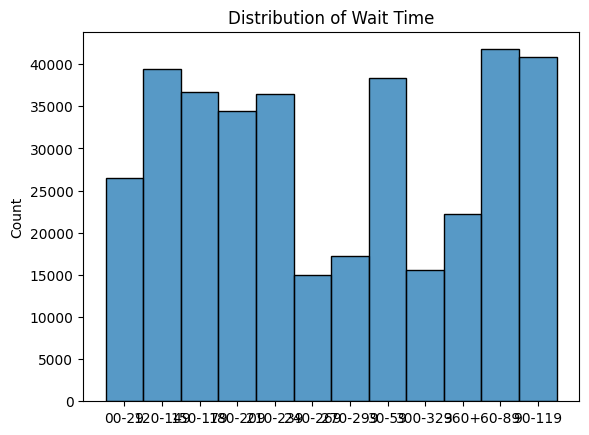

In [9]:
# We first sort the 'Wait_Time' column, then plot the histogram
sns.histplot(sorted(df['Wait_Time']), kde=False, bins=15)
plt.title('Distribution of Wait Time')
plt.show()

### Correlation Matrix

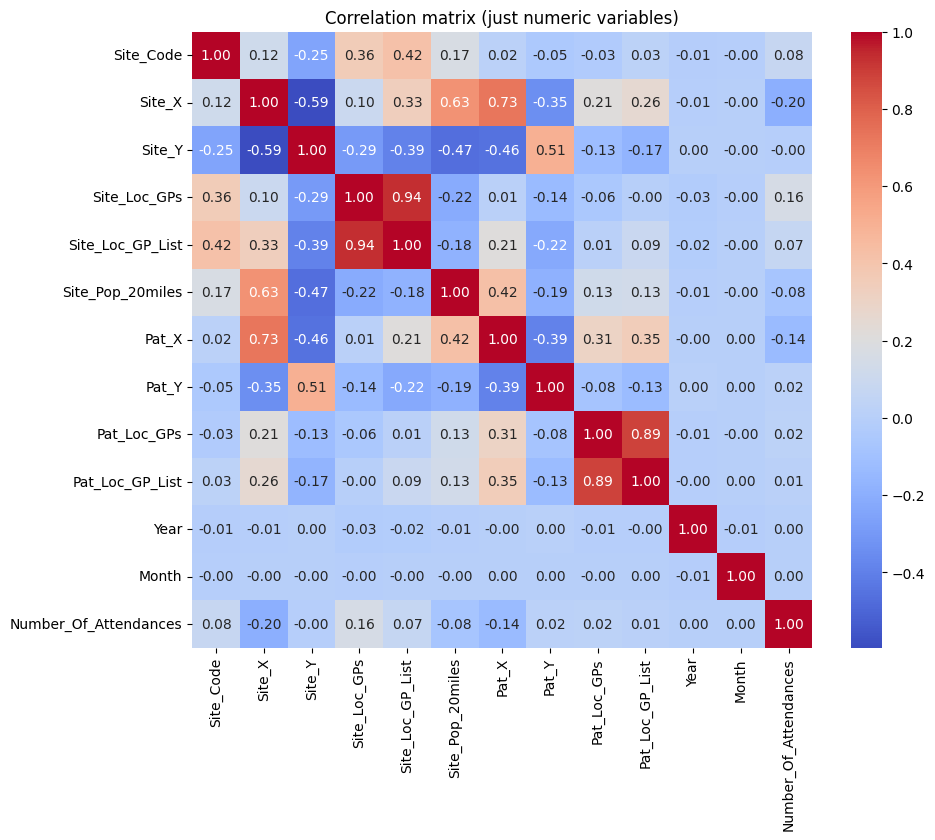

In [10]:
# Selecting just the numeric variables for analysis
# We filter the dataframe to keep only columns with numeric data types
numerical_df = df.select_dtypes(include=['number'])

# The correlation matrix is computed just for these numeric variables
# This matrix will show the pairwise correlation coefficients between numeric columns
corr_matrix = numerical_df.corr()

# Visualizing the correlation matrix using a heatmap
# We use seaborn's heatmap function to display the correlation values in a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation matrix (just numeric variables)')
plt.show()

### Spatial distribution of sites and patients

We create a scatter plot with 'Site_X' and 'Site_Y' for sites, and 'Pat_X' and 'Pat_Y' for postcodes.

The sizes of the points are different to highlight the locations of each group

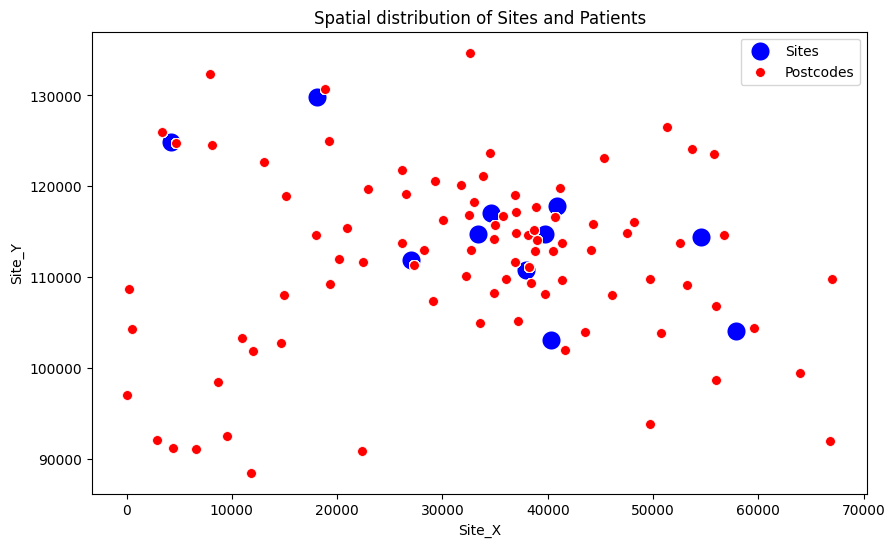

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Site_X', y='Site_Y', data=df, label='Sites', s=200, color='blue')
sns.scatterplot(x='Pat_X', y='Pat_Y', data=df, label='Postcodes', s=50, color='red')

# Title and legend
plt.title('Spatial distribution of Sites and Patients')
plt.legend()
plt.show()
